---
layout: default
title: Notes and samples on Python Topics
description: posted by ghbcode on 2013/08/5
---

# Download FRED data using the Python fredapi

The Federal Reserve Economic Data archive is a great place to find financial data. You can visit the [FRED](https://fred.stlouisfed.org/) web site to search for a data series or use the Python [fredapi](https://pypi.python.org/pypi/fredapi) to download data programmatically. Below is an example of the fredapi functionality and usage.  

In [4]:
import pandas as pd
from fredapi import Fred
import datetime as dt
# set up Fred key else queries do not work
fred = Fred(api_key='f8f51ce370435c6bfc0c78d053dfd7fe')

In [5]:
# Search for the ticker by description
ticker_description = 'Civilian Unemployment Rate'
ticker_info = fred.search(ticker_description)

if ticker_info is None:
    print("Did not find ticker by searching the text '{0}'. Pleave revise your search.".format(ticker_description))
else:
    ticker_id = ticker_info['id'].values[0]
    ticker_start = ticker_info['observation_start'].values[0]
    ticker_end = ticker_info['observation_end'].values[0]
    print("Ticker id = {0}, start_date = {1}, end_date = {2}".format(ticker_id, ticker_start, ticker_end))
    try:
        # query the ticker information from FRED using start and end dates
        s = fred.get_series(ticker_id, observation_start=ticker_start, observation_end=ticker_end)
        print(s.tail())
        # Save daily close file since inception
        s.to_csv("output/"+ticker_id+".csv")
        # Save quarterly file. Use 'QS' frequency for beginning of month data
        pd.Series(s, pd.date_range('2013-01-05', dt.datetime.now(), freq='QS')).to_csv("output/"+ticker_id+"_quarterly.csv")
    except: 
        print("Problem downloading '{0}' series".format(ticker_id))

Ticker id = UNRATE, start_date = 1948-01-01T00:00:00.000000000Z, end_date = 2017-10-31T17:00:00.000000000-0700
2017-07-01    4.3
2017-08-01    4.4
2017-09-01    4.2
2017-10-01    4.1
2017-11-01    4.1
dtype: float64


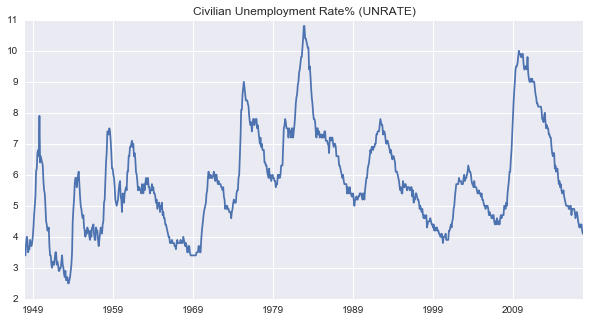

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

s.plot(figsize=(10,5), grid=True, title='{0}% ({1})'.format(ticker_description, ticker_id))